## Capstone Project - Machine Learning

Prior to this step, we have cleaned and wrangled the US Accident data and we used Seaborn and Matplotlib Libraries to visualize the important features of the data. In this step, we will use some machine learning algorithms to predict the severity of the accident from the features we have extracted in data wrangling step.

### 1. Understanding the Data

We need to firstly check what is the data we have acquired after data wrangling:

In [1]:
# Import required libraries:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Import warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
print('x' in np.arange(5)) 

False


In [3]:
# Since we have so many columns in the dataframe, we need to change the Pandas settings to observe the data frame more efficiently:
pd.options.display.max_columns = 1000
pd.options.display.max_rows = 20
pd.options.display.min_rows = 20

In [4]:
# Upload the csv file into pandas
df = pd.read_csv(r'C:\Users\Servet\Desktop\Jupyter_Notebooks\US_Accidents_with_dummies.csv', index_col=0).sample(10000)

# Check how the data looks like
df.head()

,ID,Source,TMC,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Number,Street,Side,City,County,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Precipitation_isnull,Humidity_isnull,Wind_Speed_isnull,Pressure_isnull,Temperature_isnull,Windchill_isnull,Weather_isnull,Description_isnull,City_isnull,Timezone_isnull,Zipcode_isnull,Airport_Code_isnull,Year,Month,Day,Hour,Weekday,Time_Duration(min),Nautical_Twilight_isnull,Sunrise_Sunset_isnull,Civil_Twilight_isnull,Astronomical_Twilight_isnull,Weather_Timestamp_isnull,Wind_Direction_isnull,Visibility(mi)_isnull,Number_isnull,Weather_Condition_Blowing Sand,Weather_Condition_Blowing Snow,Weather_Condition_Clear,Weather_Condition_Drizzle,Weather_Condition_Fog,Weather_Condition_Funnel Cloud,Weather_Condition_Hail,Weather_Condition_Haze,Weather_Condition_Heavy Blowing Snow,Weather_Condition_Heavy Drizzle,Weather_Condition_Heavy Freezing Rain,Weather_Condition_Heavy Ice Pellets,Weather_Condition_Heavy Rain,Weather_Condition_Heavy Rain Showers,Weather_Condition_Heavy Smoke,Weather_Condition_Heavy Snow,Weather_Condition_Heavy Thunderstorms and Rain,Weather_Condition_Heavy Thunderstorms and Snow,Weather_Condition_Heavy Thunderstorms with Small Hail,Weather_Condition_Ice Pellets,Weather_Condition_Light Drizzle,Weather_Condition_Light Fog,Weather_Condition_Light Freezing Drizzle,Weather_Condition_Light Freezing Fog,Weather_Condition_Light Freezing Rain,Weather_Condition_Light Hail,Weather_Condition_Light Haze,Weather_Condition_Light Ice Pellets,Weather_Condition_Light Rain,Weather_Condition_Light Rain Showers,Weather_Condition_Light Snow,Weather_Condition_Light Snow Showers,Weather_Condition_Light Thunderstorms and Rain,Weather_Condition_Light Thunderstorms and Snow,Weather_Condition_Low Drifting Snow,Weather_Condition_Mist,Weather_Condition_Mostly Cloudy,Weather_Condition_NaN,Weather_Condition_Overcast,Weather_Condition_Partly Cloudy,Weather_Condition_Patches of Fog,Weather_Condition_Rain,Weather_Condition_Rain Showers,Weather_Condition_Sand,Weather_Condition_Scattered Clouds,Weather_Condition_Shallow Fog,Weather_Condition_Small Hail,Weather_Condition_Smoke,Weather_Condition_Snow,Weather_Condition_Snow Grains,Weather_Condition_Snow Showers,Weather_Condition_Squalls,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Volcanic Ash,Weather_Condition_Widespread Dust,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,State_GA,State_IA,State_ID,State_IL,State_IN,State_KS,State_KY,State_LA,State_MA,State_MD,State_ME,State_MI,State_MN,State_MO,State_MS,State_MT,State_NC,State_ND,State_NE,State_NH,State_NJ,State_NM,State_NV,State_NY,State_OH,State_OK,State_OR,State_PA,State_RI,State_SC,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
42420,A-42421,MapQuest,245,3,2016-06-16 23:42:00,2016-06-17 00:12:00,37.808361,-122.241493,0.00,Two lanes blocked due to debris on road accide...,2994.125000,I-580 W,R,Oakland,Alameda,94610,US,US/Pacific,KOAK,6/16/2016 23:53,64.0,64.0,70.0,30.07,10.0,West,12.7,0.059667,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,1,0,0,0,0,1,0,0,0,0,0,0,2016,Jun,16,23,Thu,30.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75888,A-75889,MapQuest,201,2,2016-11-29 05:42:00,2016-11-29 06:27:00,33.988560,-118.358559,0.01,Accident on La Brea Ave around Slauson Ave.,5735.000000,S La Brea Ave,R,Los Angeles,Los Angeles,9

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 42420 to 628612
Columns: 176 entries, ID to State_WY
dtypes: bool(13), float64(12), int64(130), object(21)
memory usage: 12.6+ MB


In [6]:
# Now, we will define target and feature variables. Since this project is trying to generate a model to predict the severity of accidents, we will use "Severrity" as targetr variable
target_names = ['Severity']
feature_names = [c for c in df.columns if c not in target_names and df[c].dtype != object and not c.endswith('Time')]

In [7]:
# We will use X and y for the feature and target variables
X = df[feature_names]
y = df[target_names]
X.shape

(10000, 154)


There are 154 features in our feature variables list, which will cause our model to score less due to curse of dimensionality. We may need to perform some feature reduction techniques

### 2. Predict Severity with Machine Learning Algorithms - Linear Regression

Severity, the target variable is labeled from 0 to 4 and it can be considered as an ordinal numerical variable. The linear regression model may work, however, the target variable can take only discrete numbers, the model might be weaker. We will start our machine learning algorithms with a linear model.

In [96]:
# Split the data to train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=30, stratify=y)

# Import accuracy score from sckit learn
from sklearn.metrics import accuracy_score

# Import Cross-Validation from scikitlearn
from sklearn.model_selection import cross_val_score

# Import Linear Regression library and MSE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [9]:
# Instantiate a linear model as lr and fit on the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# We will check the model's strength on training and testing set and see the percent change
print("linear regression score for training set:{}".format(lr.score(X_train,y_train)))
print("linear regression score for testing set:{}".format(lr.score(X_test,y_test)))
print("the percent change from trainig set to testing set is: {}".format(100*(lr.score(X_train,y_train)-lr.score(X_test,y_test))/lr.score(X_train,y_train)))

print("R^2: {}".format(lr.score(X_test, y_test)))

y_lr_pred = lr.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_lr_pred))
print("Root Mean Squared Error: {}".format(rmse))

linear regression score for training set:0.3253552043738467
linear regression score for testing set:0.3077083240101641
the percent change from trainig set to testing set is: 5.4238813845453535
R^2: 0.3077083240101641
Root Mean Squared Error: 0.4014852732925199


In [10]:
# Cross-Validate the model
cv_lr_train_score = cross_val_score(lr,X_train,y_train,cv=10)
print(cv_lr_train_score)

cv_lr_test_score = cross_val_score(lr,X_test,y_test,cv=10)
print(cv_lr_test_score)

[0.3370725  0.29786043 0.31140737 0.28262987 0.30214713 0.30478582
 0.3031766  0.28309223 0.30333967 0.32638143]
[0.24659424 0.34721022 0.28353643 0.30998344 0.32346403 0.25149872
 0.32181292 0.17296584 0.23420137 0.27891855]


In [11]:
print("Average 10-Fold CV Score for training set: {}".format(np.mean(cv_lr_train_score)))
print("Average 10-Fold CV Score for testing set: {}".format(np.mean(cv_lr_test_score)))

Average 10-Fold CV Score for training set: 0.3051893034073344
Average 10-Fold CV Score for testing set: 0.2770185770825515


#### Ridge Regression

In [12]:
# We create an empty hyper-parameter list for tuning
hyper_param_list_ridge = []

In [13]:
from sklearn.linear_model import Ridge
alphas = [0, 0.0001, 0.001, 0.01, 0.1]
for alpha in alphas:
    ridge = Ridge(alpha=0.1, normalize=True)
    ridge.fit(X_train, y_train)
    ridge_pred = ridge.predict(X_test)
    train_score = ridge.score(X_train, y_train)
    test_score = ridge.score(X_test, y_test)
    ridge.score(X_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_list_ridge.append(hyper_params)

In [14]:
df_hyper_param_ridge = pd.DataFrame(hyper_param_list_ridge)
df_hyper_param_ridge.round(5)

,alpha,train_score,test_score
0,0.0000,0.32229,0.30384
1,0.0001,0.32229,0.30384
2,0.0010,0.32229,0.30384
3,0.0100,0.32229,0.30384
4,0.1000,0.32229,0.30384


#### Lasso Regression

In [15]:
hyper_param_list_lasso = []

In [16]:
from sklearn.linear_model import Lasso
alphas = [0, 0.0001, 0.001, 0.01, 0.1]
for alpha in alphas:
    lasso = Lasso(alpha=alpha, normalize=True, max_iter=10000)
    lasso.fit(X_train, y_train)
    lasso_pred = lasso.predict(X_test)
    train_score = lasso.score(X_train, y_train)
    test_score = lasso.score(X_test, y_test)
    hyper_params = dict(alpha=alpha, train_score=train_score, test_score=test_score)
    hyper_param_list_lasso.append(hyper_params)

C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\ipykernel_launcher.py:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  """
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 627.7500672209934, tolerance: 0.18609794999999976
  positive)


In [17]:
df_hyper_param_lasso = pd.DataFrame(hyper_param_list_lasso)
df_hyper_param_lasso.round(5)

,alpha,train_score,test_score
0,0.0000,0.32536,0.30771
1,0.0001,0.30774,0.29610
2,0.0010,0.22163,0.21044
3,0.0100,0.00000,-0.00000
4,0.1000,0.00000,-0.00000


### 3. Logistic Regression

In this problem, we have 5 outcomes for the target variable: 0,1,2,3,4. We can consider this problem as a multi-class classification problem and use logistic regression model from sklearn library.

In [18]:
# We need to convert y to numpy array and flatten it beforehand to do any calculations.
y = np.array(y)
y = y.flatten()
y.shape

(10000,)

In [19]:
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(max_iter=10000, penalty='l2')
logr.fit(X_train, y_train.values.ravel())
print("The logistic regression score on the training data:{}".format(logr.score(X_train,y_train)))

print("The logistic regression score on the testing data:{}".format(logr.score(X_test,y_test)))

The logistic regression score on the training data:0.764875
The logistic regression score on the testing data:0.755


C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


This logistic regression gives a warning since the data is not scaled. To remove the warning message, we will try to scale the data

In [20]:
# Import scale
from sklearn.preprocessing import scale

# Scale the features: X_scaled
Xs = scale(X)

# Print the mean and standard deviation of the unscaled features
print("Mean of Unscaled Features: {}".format(np.mean(X))) 
print("Standard Deviation of Unscaled Features: {}".format(np.std(X)))

# Print the mean and standard deviation of the scaled features
print("Mean of Scaled Features: {}".format(np.mean(scale(X)))) 
print("Standard Deviation of Scaled Features: {}".format(np.std(scale(X))))

Mean of Unscaled Features: TMC                207.755300
Start_Lat           36.074648
Start_Lng          -95.290235
Distance(mi)         0.139951
Number            5274.343989
Temperature(F)      62.045145
Wind_Chill(F)       60.884475
Humidity(%)         66.776867
Pressure(in)        30.037064
Visibility(mi)       9.069608
                     ...     
State_SD             0.000000
State_TN             0.017000
State_TX             0.128200
State_UT             0.005700
State_VA             0.024800
State_VT             0.000000
State_WA             0.021200
State_WI             0.002600
State_WV             0.000200
State_WY             0.000100
Length: 154, dtype: float64
Standard Deviation of Unscaled Features: TMC                 19.278709
Start_Lat            4.899739
Start_Lng           17.225355
Distance(mi)         1.237205
Number            8658.186921
Temperature(F)      18.575014
Wind_Chill(F)       20.668781
Humidity(%)         21.256640
Pressure(in)         0.191859
Visi

In [21]:
Xs_train, Xs_test, y_train, y_test = train_test_split(Xs, y, test_size=0.20, random_state=30)
logr.fit(Xs_train, y_train)
print("The logistic regression score on the scale training data:{}".format(logr.score(Xs_train,y_train)))

print("The logistic regression score on the scaled testing data:{}".format(logr.score(Xs_test,y_test)))

The logistic regression score on the scale training data:0.7735
The logistic regression score on the scaled testing data:0.759


We can observe that the scaled data yields a higher training and test score

In [22]:
# Cross-Validate the model
cv_logr_score = cross_val_score(logr,Xs_test,y_test,cv=2)
print(cv_logr_score)

[0.737 0.726]


#### Hyperparameter Tuning

In [23]:
hyper_param_list_logreg = []

In [24]:
c_vals = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
for c_val in c_vals:
    logreg = LogisticRegression(C=c_val, max_iter=10000)
    logreg.fit(Xs_train, y_train)
    train_score = logreg.score(Xs_train, y_train)
    test_score = logreg.score(Xs_test, y_test)
    hyper_params = dict(c=c_val, train_score=train_score, test_score=test_score)
    hyper_param_list_logreg.append(hyper_params)

df_hyper_param_logreg = pd.DataFrame(hyper_param_list_logreg).sort_values('test_score')
df_hyper_param_logreg.round(5)

,c,train_score,test_score
0,0.0001,0.66275,0.6605
1,0.0010,0.76150,0.7530
3,0.1000,0.77375,0.7575
2,0.0100,0.77288,0.7585
4,1.0000,0.77350,0.7590
5,10.0000,0.77475,0.7595
6,100.0000,0.77462,0.7600
7,1000.0000,0.77475,0.7600


The best test_score can be found when c=1000. Now we will do another hyperparameter tuning with penalties

In [25]:
hyper_param_list_logreg_solver = []

In [ ]:
solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']

for solver in solvers:
    logreg = LogisticRegression(C=1000, max_iter=10000, solver=solver)
    logreg.fit(Xs_train, y_train)
    train_score = logreg.score(Xs_train, y_train)
    test_score = logreg.score(Xs_test, y_test)
    hyper_params = dict(solver=solver, train_score=train_score, test_score=test_score)
    hyper_param_list_logreg_solver.append(hyper_params)

df_hyper_param_logreg_solver = pd.DataFrame(hyper_param_list_logreg_solver).sort_values('test_score')
df_hyper_param_logreg_solver.round(5)

The highest test score can be obtained by 'liblinear'

In [27]:
hyper_param_list_logreg_multi = []

In [28]:
classes = ['auto', 'ovr', 'multinomial']

for multi_class in classes:
    logreg = LogisticRegression(C=1, max_iter=10000, multi_class=multi_class)
    logreg.fit(Xs_train, y_train)
    train_score = logreg.score(Xs_train, y_train)
    test_score = logreg.score(Xs_test, y_test)
    hyper_params = dict(multi_class=multi_class, train_score=train_score, test_score=test_score)
    hyper_param_list_logreg_multi.append(hyper_params)

df_hyper_param_logreg_multi = pd.DataFrame(hyper_param_list_logreg_multi).sort_values('test_score')
df_hyper_param_logreg_multi.round(5)

,multi_class,train_score,test_score
1,ovr,0.7735,0.757
0,auto,0.7735,0.759
2,multinomial,0.7735,0.759


In [29]:
# Now we will perform the Logistic Regression with hyperparameters:
logr = LogisticRegression(C=1, max_iter=10000, solver='liblinear', multi_class='ovr')
logr.fit(Xs_train, y_train)
print("The logistic regression score on the training data:{}".format(logr.score(Xs_train,y_train)))

print("The logistic regression score on the testing data:{}".format(logr.score(Xs_test,y_test)))

The logistic regression score on the training data:0.773375
The logistic regression score on the testing data:0.757


#### Classification Report

In [30]:
from sklearn.metrics import classification_report
ys_pred = logr.predict(Xs_test)
print(classification_report(y_test, ys_pred, zero_division=1))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.85      0.76      0.80      1295
           3       0.63      0.75      0.68       702

    accuracy                           0.76      2000
   macro avg       0.49      0.50      0.50      2000
weighted avg       0.77      0.76      0.76      2000



#### Grid Search

In [31]:
from sklearn.model_selection import GridSearchCV

# Setup the hyperparameter grid
c_space = np.logspace(-5, 4, 10)
param_grid = {'C': c_space}


# Instantiate the GridSearchCV object: logreg_cv
logr_cv = GridSearchCV(logr, param_grid, cv=2)

# Fit it to the data
logr_cv.fit(Xs,y)

# Print the tuned parameters and score
print("Tuned Logistic Regression Parameters: {}".format(logr_cv.best_params_)) 
print("Best score is {}".format(logr_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.001}
Best score is 0.764


In [32]:
logr = LogisticRegression(C=0.01, max_iter=10000, penalty='l2')
logr.fit(Xs_train, y_train)
print("The logistic regression score on the scale training data:{}".format(logr.score(Xs_train,y_train)))

print("The logistic regression score on the scaled testing data:{}".format(logr.score(Xs_test,y_test)))

The logistic regression score on the scale training data:0.772875
The logistic regression score on the scaled testing data:0.7585


### 4. KNN-Neighborhood

Since this problem can be considered as a classification problem, KNN neighborghood model can be also utilized to predict the target variable.

In [33]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(X_train,y_train)

print("The KNN score on the training set:{}".format(knn.score(X_train,y_train)))

print("The KNN score on the testing set:{}".format(knn.score(X_test,y_test)))

The KNN score on the training set:0.69325
The KNN score on the testing set:0.621


In [34]:
# We will try the same algorithm on the scaled data:
knn = KNeighborsClassifier(n_neighbors = 6)
knn.fit(Xs_train,y_train)

print("The KNN score on the training set:{}".format(knn.score(Xs_train,y_train)))

print("The KNN score on the testing set:{}".format(knn.score(Xs_test,y_test)))

The KNN score on the training set:0.779875
The KNN score on the testing set:0.699


In [35]:
# We can do hyperparameter tuning on n_neighbors
hyper_param_list_knn = []

In [36]:
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(Xs_train, y_train)
    train_score = knn.score(Xs_train, y_train)
    test_score = knn.score(Xs_test, y_test)
    hyper_params = dict(n_neighbors=i, train_score=train_score, test_score=test_score)
    hyper_param_list_knn.append(hyper_params)

df_hyper_param_list_knn = pd.DataFrame(hyper_param_list_knn).sort_values('test_score')
df_hyper_param_list_knn.round(5)

,n_neighbors,train_score,test_score
0,1,1.00000,0.6630
1,2,0.84550,0.6735
2,3,0.84188,0.6835
9,10,0.76500,0.6845
7,8,0.76712,0.6860
11,12,0.75475,0.6870
12,13,0.75575,0.6875
10,11,0.76162,0.6880
4,5,0.80312,0.6890
3,4,0.80088,0.6890


In [37]:
knn?

There is a significant difference between the training and testing set scores, that we can suspect an overfitting issue. We will perform the same algorithm with the scaled test to improve the model

In [38]:
param_grid = {'n_neighbors':np.arange(1,15)}
knn_cv = GridSearchCV(knn, param_grid, cv=2)
knn_cv.fit(Xs,y)
knn_cv.best_params_

{'n_neighbors': 13}

In [39]:
knn = KNeighborsClassifier(n_neighbors = knn_cv.best_params_['n_neighbors'])
knn.fit(Xs_train,y_train)

print("The KNN score on the scale training data:{}".format(knn.score(Xs_train,y_train)))

print("The KNN score on the scaled testing data:{}".format(knn.score(Xs_test,y_test)))

The KNN score on the scale training data:0.75575
The KNN score on the scaled testing data:0.6875


There is a significant difference between the train and test scores, in which we suspect overfitting.

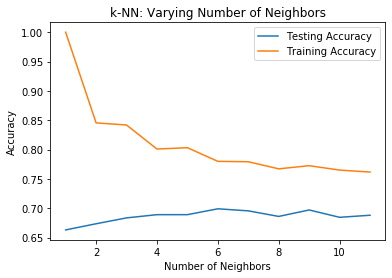

In [40]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 12)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors = k)

    # Fit the classifier to the training data
    knn.fit(Xs_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(Xs_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(Xs_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#### Confusion Matrix and Classification Report

In [41]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[   0    3    0]
 [   0 1102  193]
 [   0  599  103]]
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         3
           2       0.65      0.85      0.73      1295
           3       0.35      0.15      0.21       702

    accuracy                           0.60      2000
   macro avg       0.33      0.33      0.31      2000
weighted avg       0.54      0.60      0.55      2000



C:\Users\Servet\AppData\Local\Continuum\anaconda\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 5. Decision Tree

In [42]:
# Decision tree algorithm
# Import DecisionTreeClassifier from sklearn.tree
from sklearn.tree import DecisionTreeClassifier

# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=8, criterion='entropy', random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)


print("Decision tree entropy score on the training data:{}".format(dt_entropy.score(X_train,y_train)))

print("Decision tree entropy score on the testing data:{}".format(dt_entropy.score(X_test,y_test)))

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)


# Print accuracy_entropy
print('Decision Tree -- entropy accuracy_score: {:.3f}.'.format(accuracy_entropy))



Decision tree entropy score on the training data:0.654
Decision tree entropy score on the testing data:0.6205
[Decision Tree -- entropy] accuracy_score: 0.621.


In [53]:
hyper_param_list_dt_entropy = []

In [54]:
for i in range(1,21):
    dt_entropy = DecisionTreeClassifier(max_depth=i)
    dt_entropy.fit(Xs_train, y_train)
    train_score = dt_entropy.score(Xs_train, y_train)
    test_score = dt_entropy.score(Xs_test, y_test)
    hyper_params = dict(max_depth=i, train_score=train_score, test_score=test_score)
    hyper_param_list_dt_entropy.append(hyper_params)

df_hyper_param_list_dt_entropy = pd.DataFrame(hyper_param_list_dt_entropy).sort_values('test_score')
df_hyper_param_list_dt_entropy.round(5)

,max_depth,train_score,test_score
0,1,0.69200,0.6935
2,3,0.75088,0.7475
1,2,0.74988,0.7495
3,4,0.76138,0.7565
4,5,0.77138,0.7670
6,7,0.79525,0.7670
7,8,0.80725,0.7710
18,19,0.93650,0.7725
5,6,0.78338,0.7730
19,20,0.94438,0.7755


In [59]:
hyper_param_list_dt_entropy_min_samples_split = []

In [60]:
for i in range(2,21):
    dt_entropy_min_samples_split = DecisionTreeClassifier(max_depth=12, min_samples_split=i)
    dt_entropy_min_samples_split.fit(Xs_train, y_train)
    train_score = dt_entropy_min_samples_split.score(Xs_train, y_train)
    test_score = dt_entropy_min_samples_split.score(Xs_test, y_test)
    hyper_params = dict(max_depth=i, train_score=train_score, test_score=test_score)
    hyper_param_list_dt_entropy_min_samples_split.append(hyper_params)

df_hyper_param_list_dt_entropy_min_samples_split = pd.DataFrame(hyper_param_list_dt_entropy_min_samples_split).sort_values('test_score')
df_hyper_param_list_dt_entropy_min_samples_split.round(5)

,max_depth,train_score,test_score
18,20,0.83625,0.7855
16,18,0.83750,0.7855
2,4,0.85588,0.7855
15,17,0.83862,0.7855
17,19,0.83712,0.7860
14,16,0.83975,0.7865
0,2,0.85825,0.7870
3,5,0.85475,0.7870
5,7,0.85025,0.7875
11,13,0.84300,0.7875


In [83]:
# Instantiate dt_entropy, set 'entropy' as the information criterion
dt_entropy = DecisionTreeClassifier(max_depth=12, criterion='entropy',min_samples_split=9, random_state=1)


# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)


print("Decision tree entropy score on the training data:{}".format(dt_entropy.score(X_train,y_train)))

print("Decision tree entropy score on the testing data:{}".format(dt_entropy.score(X_test,y_test)))

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Print accuracy_entropy
print('Decision Tree -- entropy accuracy_score: {:.5f}.'.format(accuracy_entropy))

Decision tree entropy score on the training data:0.860875
Decision tree entropy score on the testing data:0.76
Decision Tree -- entropy accuracy_score: 0.76000.


In [45]:
DecisionTreeClassifier?

In [48]:
# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=8, criterion='gini', random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)


print("Decision tree gini score on the training data:{}".format(dt_gini.score(X_train,y_train)))

print("Decision tree gini score on the testing data:{}".format(dt_gini.score(X_test,y_test)))

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
acc=accuracy_gini

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

Decision tree gini score on the training data:0.66375
Decision tree gini score on the testing data:0.6365
[Decision Tree -- gini] accuracy_score: 0.636.


In [55]:
hyper_param_list_dt_gini = []

In [56]:
for i in range(1,21):
    dt_gini = DecisionTreeClassifier(max_depth=i)
    dt_gini.fit(Xs_train, y_train)
    train_score = dt_gini.score(Xs_train, y_train)
    test_score = dt_gini.score(Xs_test, y_test)
    hyper_params = dict(max_depth=i, train_score=train_score, test_score=test_score)
    hyper_param_list_dt_gini.append(hyper_params)

df_hyper_param_list_dt_gini = pd.DataFrame(hyper_param_list_dt_gini).sort_values('test_score')
df_hyper_param_list_dt_gini.round(5)

,max_depth,train_score,test_score
0,1,0.69200,0.6935
2,3,0.75088,0.7475
1,2,0.74988,0.7495
3,4,0.76138,0.7565
6,7,0.79525,0.7660
4,5,0.77138,0.7670
7,8,0.80725,0.7695
5,6,0.78338,0.7730
17,18,0.92825,0.7730
19,20,0.94450,0.7770


In [79]:
hyper_param_list_gini_min_samples_split = []

In [80]:
for i in range(2,21):
    dt_gini_min_samples_split = DecisionTreeClassifier(max_depth=11, min_samples_split=i)
    dt_gini_min_samples_split.fit(Xs_train, y_train)
    train_score = dt_gini_min_samples_split.score(Xs_train, y_train)
    test_score = dt_gini_min_samples_split.score(Xs_test, y_test)
    hyper_params = dict(max_depth=i, train_score=train_score, test_score=test_score)
    hyper_param_list_gini_min_samples_split.append(hyper_params)

df_hyper_param_list_gini_min_samples_split = pd.DataFrame(hyper_param_list_gini_min_samples_split).sort_values('test_score')
df_hyper_param_list_gini_min_samples_split.round(5)

,max_depth,train_score,test_score
5,7,0.68800,0.6125
0,2,0.69125,0.6145
6,8,0.68775,0.6145
9,11,0.68588,0.6145
3,5,0.68875,0.6145
10,12,0.68562,0.6150
4,6,0.68862,0.6155
1,3,0.69050,0.6160
8,10,0.68650,0.6160
18,20,0.68038,0.6160


In [85]:
# Instantiate dt_gini, set 'gini' as the information criterion
dt_gini = DecisionTreeClassifier(max_depth=13, criterion='gini', min_samples_leaf=9, random_state=1)


# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)


print("Decision tree gini score on the training data:{}".format(dt_gini.score(X_train,y_train)))

print("Decision tree gini score on the testing data:{}".format(dt_gini.score(X_test,y_test)))

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Print accuracy_gini
print('[Decision Tree -- gini] accuracy_score: {:.3f}.'.format(accuracy_gini))

Decision tree gini score on the training data:0.838
Decision tree gini score on the testing data:0.777
[Decision Tree -- gini] accuracy_score: 0.777.


### 6. Random Forest

In [61]:
# Import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(Xs_train,y_train)

y_pred=clf.predict(Xs_test)


# Get the accuracy score
acc=accuracy_score(y_test, y_pred)


# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.5f}.".format(acc))

print("The clf score on the training data:{}".format(logr.score(Xs_train,y_train)))

print("The clf regression score on the testing data:{}".format(logr.score(Xs_test,y_test)))

[Random forest algorithm] accuracy_score: 0.790.
The clf score on the training data:0.772875
The clf regression score on the testing data:0.7585


In [90]:
clf_hyperparameters_list = []

In [91]:
for i in range(5,150,5):
    clf_i = RandomForestClassifier(n_estimators=i)
    clf_i.fit(Xs_train, y_train)
    train_score = clf_i.score(Xs_train, y_train)
    test_score = clf_i.score(Xs_test, y_test)
    hyper_params = dict(n_estimators=i, train_score=train_score, test_score=test_score)
    clf_hyperparameters_list.append(hyper_params)

df_clf_hyperparameters_list = pd.DataFrame(clf_hyperparameters_list).sort_values('test_score')
df_clf_hyperparameters_list.round(5)

,n_estimators,train_score,test_score
0,5,0.95150,0.5650
4,25,0.99938,0.5855
1,10,0.97625,0.5940
6,35,1.00000,0.6030
3,20,0.99600,0.6080
2,15,0.99525,0.6095
5,30,0.99912,0.6120
9,50,1.00000,0.6130
12,65,1.00000,0.6140
13,70,1.00000,0.6160


In [86]:
RandomForestClassifier?

In [100]:
# Import Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Instantiate the Regressor
rfr = RandomForestRegressor()

# Fit the model using X and y
rfr.fit(X_train, y_train)

# Print how important each column is to the model
for i, item in enumerate(rfr.feature_importances_):
      # Use i and item to print out the feature importance of each column
    print("{0:s}: {1:.2f}".format(X_train.columns[i], item))

TMC: 0.02
Start_Lat: 0.10
Start_Lng: 0.10
Distance(mi): 0.02
Number: 0.06
Temperature(F): 0.03
Wind_Chill(F): 0.03
Humidity(%): 0.04
Pressure(in): 0.04
Visibility(mi): 0.01
Wind_Speed(mph): 0.03
Precipitation(in): 0.01
Amenity: 0.00
Bump: 0.00
Crossing: 0.00
Give_Way: 0.00
Junction: 0.00
No_Exit: 0.00
Railway: 0.00
Roundabout: 0.00
Station: 0.00
Stop: 0.00
Traffic_Calming: 0.00
Traffic_Signal: 0.06
Turning_Loop: 0.00
Precipitation_isnull: 0.00
Humidity_isnull: 0.00
Wind_Speed_isnull: 0.00
Pressure_isnull: 0.00
Temperature_isnull: 0.00
Windchill_isnull: 0.00
Weather_isnull: 0.00
Description_isnull: 0.00
City_isnull: 0.00
Timezone_isnull: 0.00
Zipcode_isnull: 0.00
Airport_Code_isnull: 0.00
Year: 0.01
Day: 0.04
Hour: 0.04
Time_Duration(min): 0.03
Nautical_Twilight_isnull: 0.00
Sunrise_Sunset_isnull: 0.00
Civil_Twilight_isnull: 0.00
Astronomical_Twilight_isnull: 0.00
Weather_Timestamp_isnull: 0.00
Wind_Direction_isnull: 0.00
Visibility(mi)_isnull: 0.00
Number_isnull: 0.25
Weather_Condition

### 7. Feature Selection

In [62]:
# We need to check the data typeds of X and Xs
print(type(X))
print(type(Xs))

<class 'pandas.core.frame.DataFrame'>
<class 'numpy.ndarray'>


In [63]:
# Change the data type of Xs
df_Xs = pd.DataFrame(Xs)
type(df_Xs)

pandas.core.frame.DataFrame

In [64]:
# Create a mask with Variance threshold
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.05)
sel.fit(df_Xs)

mask = sel.get_support()
print(mask)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True  True  True  True False False  True  True
  True  True  True  True  True False False False False  True  True  True
  True False  True  True  True  True False False  True False  True False
 False  True False False  True  True False False False  True False  True
  True  True False False  True  True  True  True False  True False False
  True  True  True  True  True  True  True False False  True  True  True
  True  True False False False  True  True False  True  True False  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True False  True  True  True  True False  True False
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True  True  True False  True  True  True  True]


In [65]:
Xs_reduced = df_Xs.loc[:,mask]
type(Xs_reduced)

pandas.core.frame.DataFrame

In [159]:
# List of algorithms
algorithm_list=['Linear Regression','Logistic Regression',' K-Nearest Neighbors','Decision Trees - Entropy','Decision Trees - Gini','Random Forest']

# Create an empty list for training scores
training_scores = []

# Create an empty list for testing scores
testing_scores = []

In [160]:
Xs_reduced_train, Xs_reduced_test, y_train, y_test = train_test_split( Xs_reduced, y, test_size=0.20, random_state=30, stratify=y)

lr.fit(Xs_reduced_train,y_train)

print("The lr score on the reduced training data:{}".format(lr.score(Xs_reduced_train,y_train)))
print("The lr score on the reduced training data:{}".format(lr.score(Xs_reduced_test,y_test)))

training_scores.append(lr.score(Xs_reduced_train,y_train))
testing_scores.append(lr.score(Xs_reduced_test,y_test))

The lr score on the reduced training data:0.32535502260658156
The lr score on the reduced training data:0.30771942234928407


In [161]:
logr.fit(Xs_reduced_train,y_train)

print("The logr score on the reduced training data:{}".format(logr.score(Xs_reduced_train,y_train)))
print("The logr score on the reduced training data:{}".format(logr.score(Xs_reduced_test,y_test)))

training_scores.append(logr.score(Xs_reduced_train,y_train))
testing_scores.append(logr.score(Xs_reduced_test,y_test))

The logr score on the reduced training data:0.77275
The logr score on the reduced training data:0.7535


In [162]:
knn.fit(Xs_reduced_train,y_train)

print("The KNN score on the reduced training data:{}".format(knn.score(Xs_reduced_train,y_train)))
print("The KNN score on the reduced training data:{}".format(knn.score(Xs_reduced_test,y_test)))

training_scores.append(knn.score(Xs_reduced_train,y_train))
testing_scores.append(knn.score(Xs_reduced_test,y_test))

The KNN score on the reduced training data:0.7575
The KNN score on the reduced training data:0.687


In [163]:
# Fit dt_entropy to the training set
dt_entropy.fit(Xs_reduced_train, y_train)


print("Decision tree entropy score on the training data:{}".format(dt_entropy.score(Xs_reduced_train,y_train)))

print("Decision tree entropy score on the testing data:{}".format(dt_entropy.score(Xs_reduced_test,y_test)))

training_scores.append(dt_entropy.score(Xs_reduced_train,y_train))
testing_scores.append(dt_entropy.score(Xs_reduced_test,y_test))

Decision tree entropy score on the training data:0.86125
Decision tree entropy score on the testing data:0.7625


In [164]:
# Fit dt_gini to the training set
dt_gini.fit(Xs_reduced_train, y_train)


print("Decision tree gini score on the training data:{}".format(dt_gini.score(Xs_reduced_train,y_train)))

print("Decision tree gini score on the testing data:{}".format(dt_gini.score(Xs_reduced_test,y_test)))

training_scores.append(dt_gini.score(Xs_reduced_train,y_train))
testing_scores.append(dt_gini.score(Xs_reduced_test,y_test))

Decision tree gini score on the training data:0.838
Decision tree gini score on the testing data:0.775


In [165]:
clf.fit(Xs_reduced_train,y_train)

print("The clf score on the training data:{}".format(clf.score(Xs_reduced_train,y_train)))

print("The clf regression score on the testing data:{}".format(clf.score(Xs_reduced_test,y_test)))

training_scores.append(clf.score(Xs_reduced_train,y_train))
testing_scores.append(clf.score(Xs_reduced_test,y_test))

The clf score on the training data:1.0
The clf regression score on the testing data:0.795


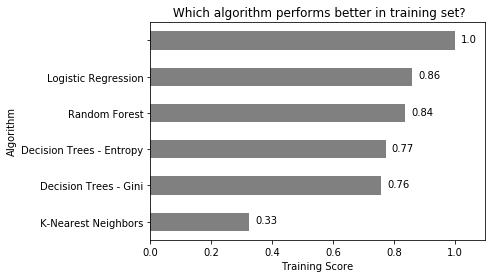

In [169]:
# Make a plot of the training scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algorithm_list))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_train = pd.DataFrame(list(zip(algorithm_list, training_scores)), columns=['Algorithm','Training_Score']).sort_values(by=['Training_Score'],ascending = True)

# Make a plot
ax = df_train.plot.barh('Algorithm', 'Training_Score', align='center',legend=False, color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Training Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title(' Which algorithm performs better in training set?')

plt.show()

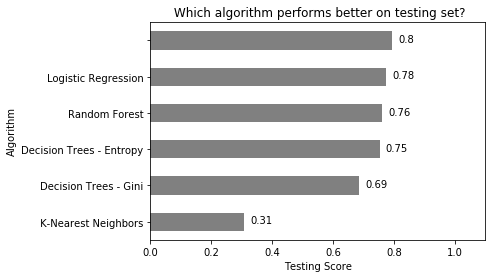

In [170]:
# Make a plot of the testing scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algorithm_list))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_test = pd.DataFrame(list(zip(algorithm_list, testing_scores)), columns=['Algorithm','Testing_Score']).sort_values(by=['Testing_Score'],ascending = True)

# Make a plot
ax = df_test.plot.barh('Algorithm', 'Testing_Score', align='center',legend=False, color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Testing Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title(' Which algorithm performs better on testing set?')

plt.show()

### 8. Feature Importance

No handles with labels found to put in legend.


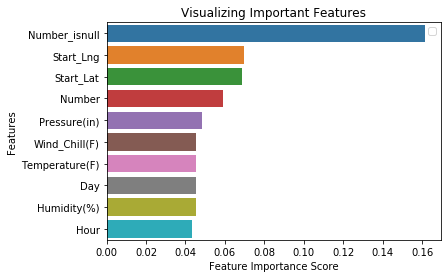

In [141]:
from sklearn.feature_selection import SelectFromModel

feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)

# Creating a bar plot, displaying only the top k features
k=10
sns.barplot(x=feature_imp[:10], y=feature_imp.index[:k])
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [73]:
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.03
sfm = SelectFromModel(clf, threshold=0.03)

# Train the selector
sfm.fit(X_train, y_train)

feat_labels=X.columns

# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

TMC
Start_Lat
Start_Lng
Number
Temperature(F)
Wind_Chill(F)
Humidity(%)
Pressure(in)
Wind_Speed(mph)
Traffic_Signal
Day
Hour
Time_Duration(min)
Number_isnull


In [76]:
# Transform the data to create a new dataset containing only the most important features
# Note: We have to apply the transform to both the training X and test X data.
X_important_train = sfm.transform(X_train)
X_important_test = sfm.transform(X_test)

# Create a new random forest classifier for the most important features
clf_important = RandomForestClassifier(n_estimators=100, random_state=0, n_jobs=-1)

# Train the new classifier on the new dataset containing the most important features
clf_important.fit(X_important_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [140]:
# Apply The Full Featured Classifier To The Test Data
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

# View The Accuracy Of Our Full Feature Model
print('Random forest algorithm -- Full feature accuracy_score: {:.5f}.'.format(accuracy_score(y_test, y_pred)))

# Apply The Full Featured Classifier To The Test Data
y_important_pred = clf_important.predict(X_important_test)

# View The Accuracy Of Our Limited Feature Model
print('[Random forest algorithm -- Limited feature accuracy_score: {:.5f}.'.format(accuracy_score(y_test, y_important_pred)))

Random forest algorithm -- Full feature accuracy_score: 0.79500.
[Random forest algorithm -- Limited feature accuracy_score: 0.79200.


### 9. Which Algorithm Performs Better

In this part, we will examine, which algorithm will yield the highest accuracy score

In [124]:
# List of classification algorithms
algo_list=['Logistic Regression',' K-Nearest Neighbors','Decision Trees - Entropy','Decision Trees - Gini','Random Forest']

# Initialize an empty list for the accuracy for each algorithm
accuracy_list=[]

In [132]:
# Logistic regression
logr.fit(X_train,y_train)
y_pred = logr.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_list.append(acc)

print("[Logistic regression algorithm] accuracy_score: {:.5f}.".format(acc))

[Logistic regression algorithm] accuracy_score: 0.75000.


In [133]:
# KNN Neighborhood
knn.fit(X_train,y_train)

# Predict the labels for the training data X
y_pred = knn.predict(X_test)

# Get the accuracy score
acc = accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_list.append(acc)

print('[K-Nearest Neighbors (KNN)] accuracy_score: {:.5f}.'.format(acc))

[K-Nearest Neighbors (KNN)] accuracy_score: 0.66500.


In [134]:
# Decision Tree with Entropy

# Fit dt_entropy to the training set
dt_entropy.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_entropy.predict(X_test)

# Evaluate accuracy_entropy
accuracy_entropy = accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_list.append(accuracy_entropy)

# Print accuracy_entropy
print('[Decision Tree -- entropy] accuracy_score: {:.5f}.'.format(accuracy_entropy))

[Decision Tree -- entropy] accuracy_score: 0.76000.


In [135]:
# Decision Tree with gini

# Fit dt_entropy to the training set
dt_gini.fit(X_train, y_train)

# Use dt_entropy to predict test set labels
y_pred= dt_gini.predict(X_test)

# Evaluate accuracy_entropy
accuracy_gini = accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_list.append(accuracy_gini)

# Print accuracy_entropy
print('[Decision Tree -- gini] accuracy_score: {:.5f}.'.format(accuracy_gini))

[Decision Tree -- gini] accuracy_score: 0.77700.


In [136]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


# Get the accuracy score
acc = accuracy_score(y_test, y_pred)

# Append to the accuracy list
accuracy_list.append(acc)


# Model Accuracy, how often is the classifier correct?
print("[Random forest algorithm] accuracy_score: {:.5f}.".format(acc))

[Random forest algorithm] accuracy_score: 0.80000.


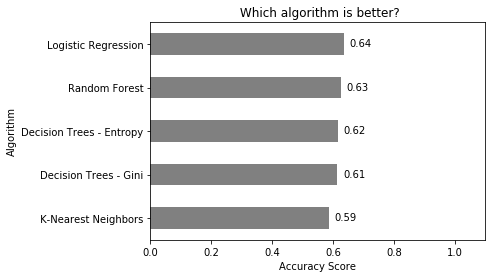

In [138]:
# Make a plot of the accuracy scores for different algorithms

# Generate a list of ticks for y-axis
y_ticks=np.arange(len(algo_list))

# Combine the list of algorithms and list of accuracy scores into a dataframe, sort the value based on accuracy score
df_acc = pd.DataFrame(list(zip(algo_list, accuracy_list)), columns=['Algorithm','Accuracy_Score']).sort_values(by=['Accuracy_Score'],ascending = True)

# Make a plot
ax = df_acc.plot.barh('Algorithm', 'Accuracy_Score', align='center',legend=False, color='0.5')

# Add the data label on to the plot
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+0.02, i.get_y()+0.2, str(round(i.get_width(),2)), fontsize=10)

# Set the limit, lables, ticks and title
plt.xlim(0,1.1)
plt.xlabel('Accuracy Score')
plt.yticks(y_ticks, df_acc['Algorithm'], rotation=0)
plt.title(' Which algorithm is better?')

plt.show()